In [36]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
)
from sklearn.tree import plot_tree

In [6]:
# Create dataframe
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print(list(df.columns))

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df = df.replace(" ", pd.NA)  # Replace blank strings with NA across the whole DataFrame
df = df.dropna()

In [10]:
# Remove whitespace and missing data
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [11]:
# Drop customerID column
df = df.drop("customerID", axis=1)

In [12]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
# Encode the 'Gender' column manually
df["gender"] = df["gender"].map({"Female": 1, "Male": 0})

In [14]:
# Create dummy variable and drop redundant col
telecom_cust_dummies = pd.get_dummies(df, drop_first=True)

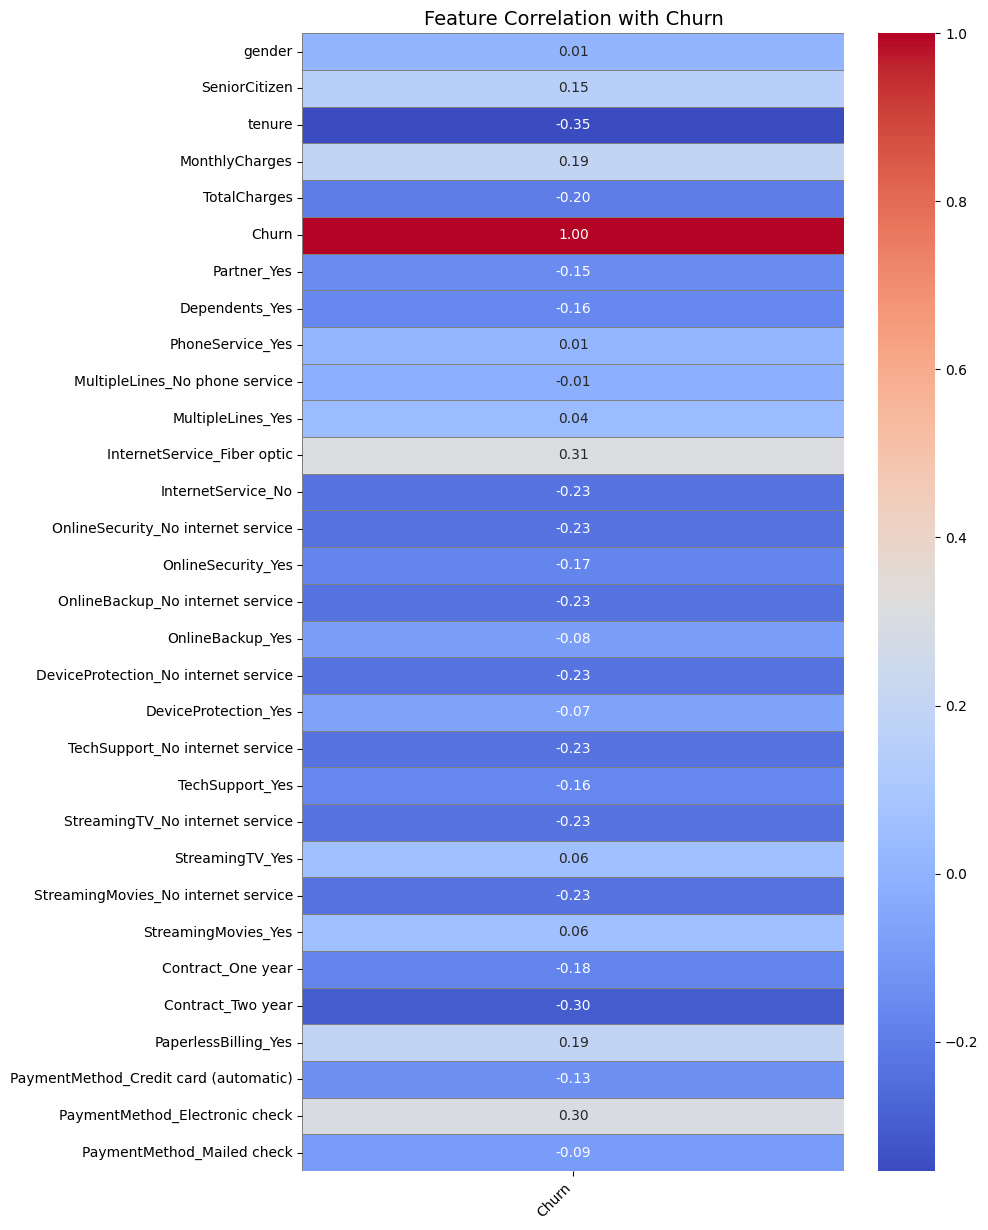

In [15]:
corr_matrix = telecom_cust_dummies.corr()
# Extract correlation of all features with 'Churn'
churn_corr = corr_matrix[["Churn"]]

plt.figure(figsize=(10, len(churn_corr) * 0.4))
sns.heatmap(
    churn_corr,
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="gray",
    cbar=True,
    fmt=".2f",
    annot_kws={"size": 10},
)
plt.title("Feature Correlation with Churn", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

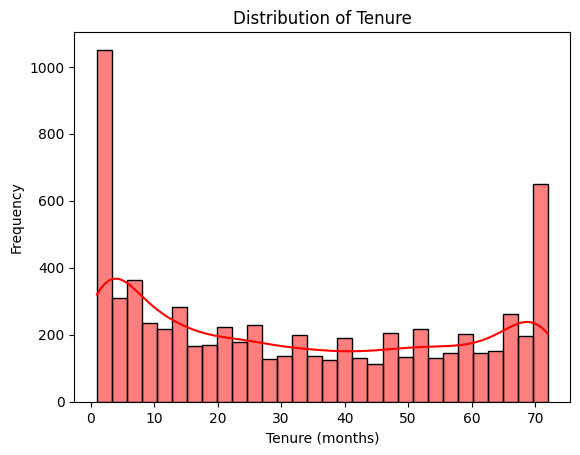

In [16]:
# Histogram plot of 'tenure'
sns.histplot(data=df, x="tenure", bins=30, kde=True, color="red")
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Frequency")
plt.show()

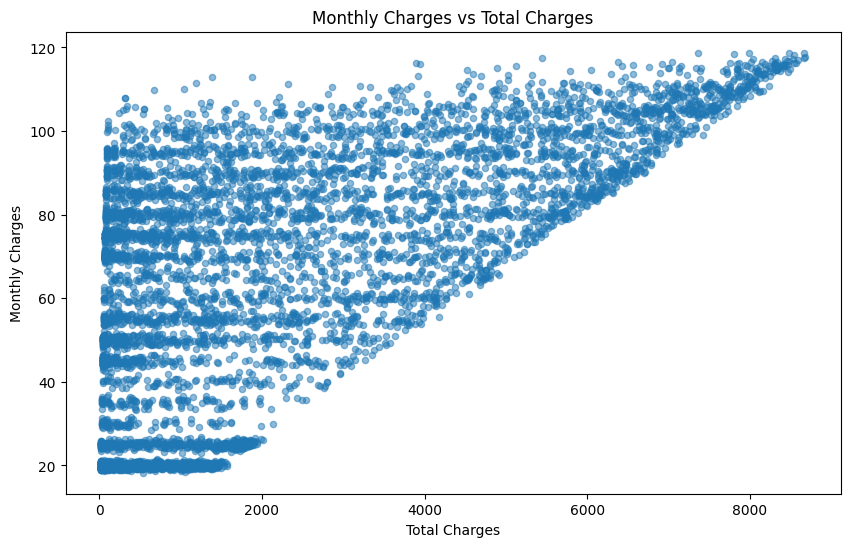

In [17]:
# Scatter plot
x = df["TotalCharges"]
y = df["MonthlyCharges"]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=20, alpha=0.5)
plt.xlabel("Total Charges")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges vs Total Charges")
plt.show()

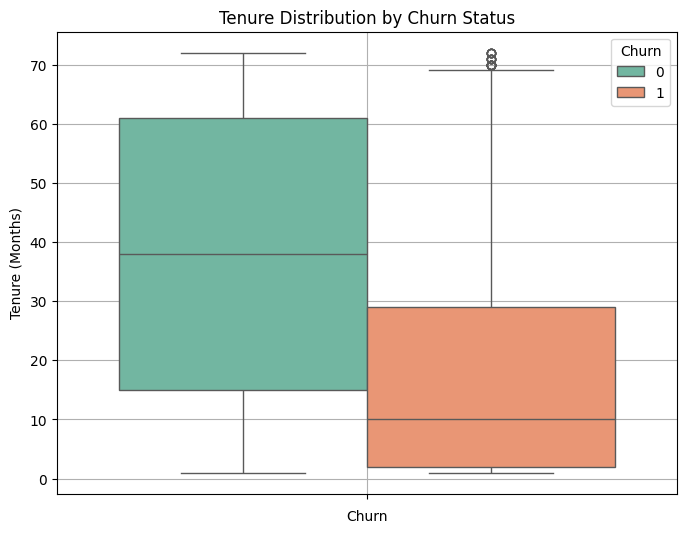

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, hue="Churn", y="tenure", palette="Set2", legend=True)

plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.grid(True)
plt.show()

In [19]:
X = telecom_cust_dummies.drop("Churn", axis=1)
y = telecom_cust_dummies["Churn"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)

In [20]:
# Create the model
logreg = LogisticRegression(max_iter=1000)

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Logistic Regression Accuracy:", round(accuracy * 100, 2), "%")

Logistic Regression Accuracy: 79.12 %


In [23]:
print("Predicted Churn values:", y_pred[:20])
print("Actual Churn values:   ", y_test[:20].values)

Predicted Churn values: [0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0]
Actual Churn values:    [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1]


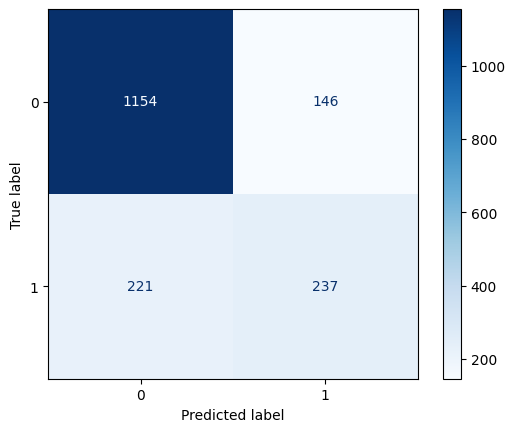

In [24]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap="Blues")

In [25]:
# Create the model with the specified hyperparameters
rf_model = RandomForestClassifier(
    n_estimators=2000,
    oob_score=True,
    max_features="sqrt",
    max_leaf_nodes=50,
    bootstrap=True,
    random_state=42,
)

# Fit model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")

# OOB Error Estimation
oob_error = 1 - rf_model.oob_score_
print(f"OOB Error Estimate: {oob_error:.4f}")

Random Forest Test Accuracy: 0.7929
OOB Error Estimate: 0.1923


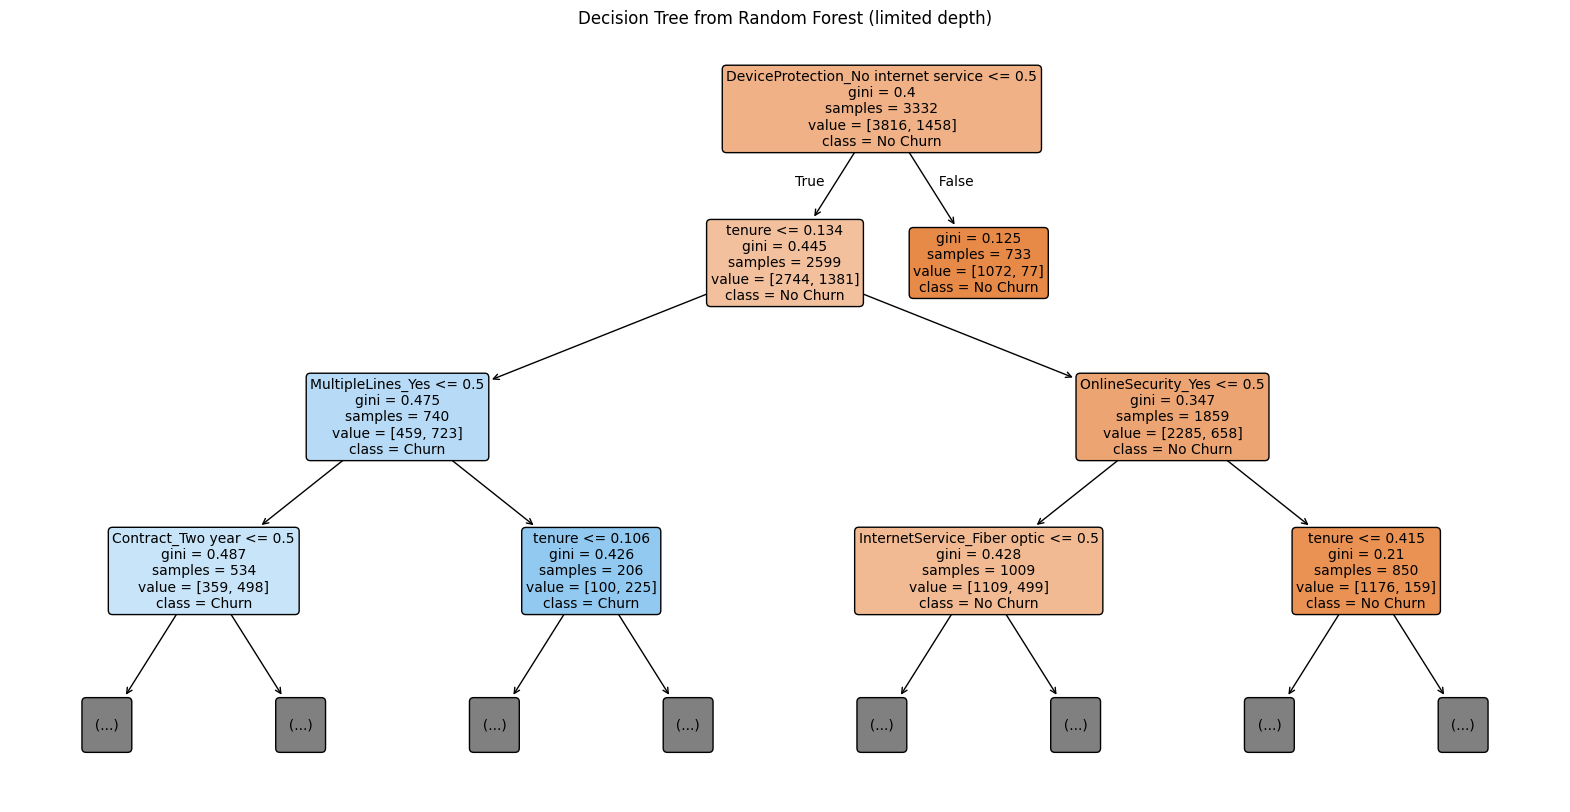

In [26]:
# Pick one tree from the forest (e.g., the first one)
estimator = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(
    estimator,
    feature_names=X.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    max_depth=3,  # Limit depth to avoid clutter
    fontsize=10,
)
plt.title("Decision Tree from Random Forest (limited depth)")
plt.show()

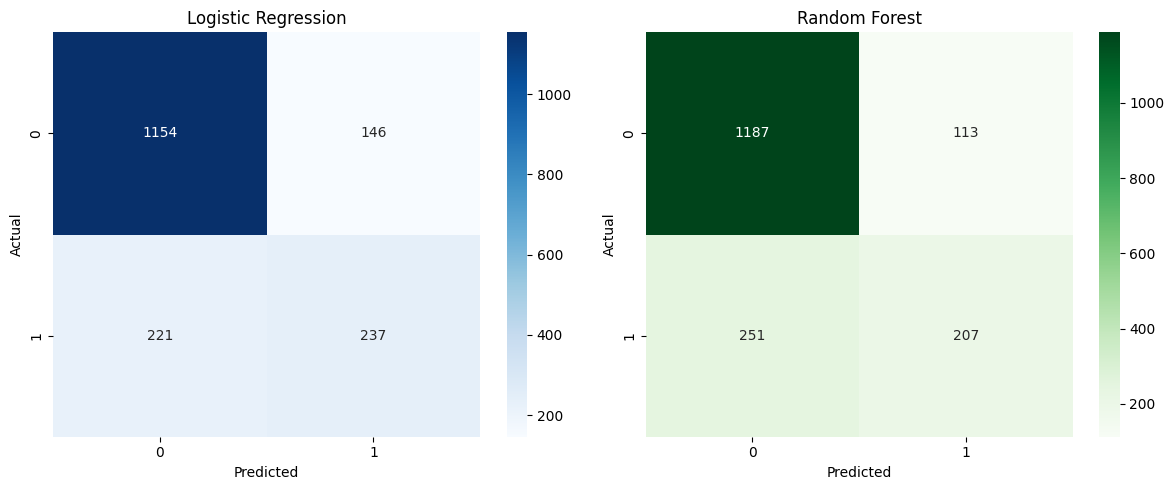

In [30]:
# Compute confusion matrices
cm_logreg = confusion_matrix(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

In [28]:
# Precision and Recall of regression model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))

Precision: 0.62
Recall: 0.52


In [31]:
# Precision and Recall of random forest model
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
print("Precision:", round(precision_rf, 2))
print("Recall:", round(recall_rf, 2))

Precision: 0.65
Recall: 0.45


In [34]:
# F1 Scores
f1_lr = f1_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Logistic Regression F1 Score: {round(f1_lr, 2)}")
print(f"Random Forest F1 Score: {round(f1_rf, 2)}")

Logistic Regression F1 Score: 0.56
Random Forest F1 Score: 0.53


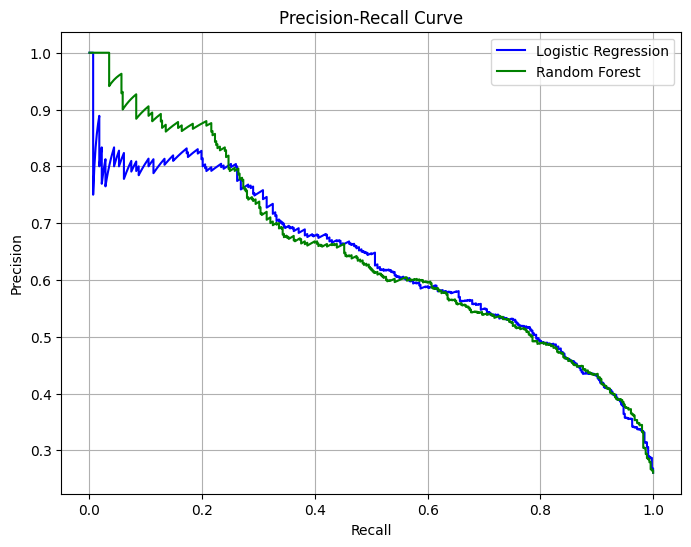

In [37]:
# Probabilities
y_scores_lr = logreg.predict_proba(X_test)[:, 1]
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

# Curves
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_scores_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label="Logistic Regression", color="blue")
plt.plot(recall_rf, precision_rf, label="Random Forest", color="green")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

Logistic Regression:

Precision:
The logistic regression model has a precision of 0.62, meaning, 62% of customers predicted to churn by the logistic regression model actually churned. There’s a relatively high number of false positives, thus may imply that resources may be wasted on customers who won’t churn.

Recall:
The recall of 0.52 means the model is catching 52% of the actual churners. It’s missing 48% of the churners, so this model might not be as aggressive in identifying customers who need retention efforts.

Confusion Matrix Insights: 
Given the moderate precision and recall, the logistic regression model seems fairly balanced but may not perform well on highly imbalanced datasets.

Random Forest:

Precision: 
The random forest model has a precision of 0.65, meaning 65% of the customers predicted to churn actually churned. It performs slightly better than logistic regression in terms of being more selective about its positive predictions, reducing false positives.

Recall:
The recall of 0.45 indicates that the random forest model is catching 45% of the actual churners, but missing 55% of them. Although recall is lower than logistic regression, it’s still somewhat effective at identifying churners.

Confusion Matrix Insights:
The random forest model is a bit more precise in its predictions, but it’s still missing a significant portion of the churners (lower recall). This possibly indicates that the model is being more cautious and only predicting churn for customers it’s more certain about.

Logistic Regression is more interpretable and can be more useful if one need a model that’s easy to explain to stakeholders. However, its moderate precision and recall mean that it could be better for situations where one would want a more balanced approach, but with higher recall (catching churners) and less emphasis on minimizing false positives.

Random Forest is more complex but potentially more powerful. Its slightly higher precision (0.65 vs 0.62) means it’s superior when reducing false positives. However, its lower recall (0.45) means it’s missing more churners than the logistic regression model.

For this scenario, the Logistic Regression model is the best model of the two, since it has a higher F1 score (0.56), compared to that of the Random Forest (0.53)